In [2]:
# leer el data frame
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()

# Define the relative path to the csv file
csv_path = os.path.join(cwd, 'data', 'data_santander_red.csv')

# Load the csv file into a pandas dataframe
df_santander = pd.read_csv(csv_path)

# get the relative address
print(os.getcwd())

# show the first 5 rows of the dataframe
df_santander.head()

c:\git\Python\python\Estudio\Data Science\Análisis Exploratorio\Caso Práctico


,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


1 - Datos Missing
- Observar si hay tipos de datos missing y graficarlos


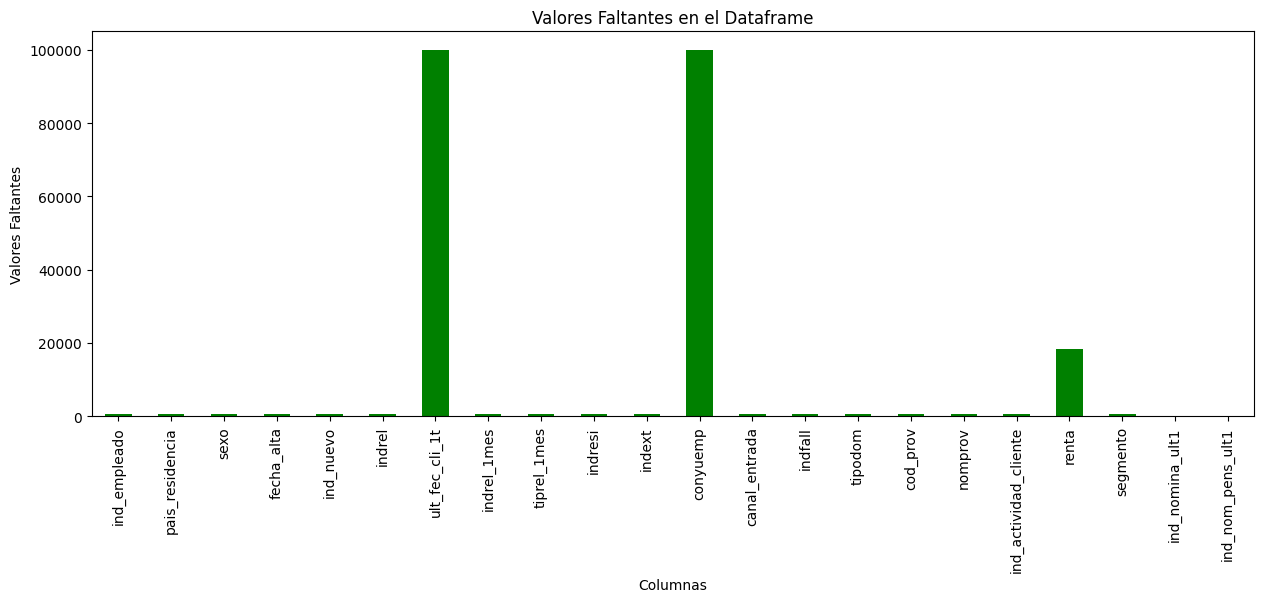

In [7]:

from matplotlib import pyplot as plt

missing_values = df_santander.isnull().sum()
# Plot the missing values
missing_values[missing_values > 0].plot(kind='bar', color='green', figsize=(15, 5))
plt.xlabel('Columnas')
plt.ylabel('Valores Faltantes')
plt.title('Valores Faltantes en el Dataframe')
plt.show()

- Calcular el % que supone para cada variable y proponer varias soluciones para la variable “ind_nomina_ult1”. 

In [8]:
# Calculate the percentage for each variable
percentage = df_santander.count() / len(df_santander) * 100

# Print the percentage for each variable
print(percentage)


Unnamed: 0               100.000
fecha_dato               100.000
ncodpers                 100.000
ind_empleado              99.317
pais_residencia           99.317
sexo                      99.317
age                      100.000
fecha_alta                99.317
ind_nuevo                 99.317
antiguedad               100.000
indrel                    99.317
ult_fec_cli_1t             0.128
indrel_1mes               99.317
tiprel_1mes               99.317
indresi                   99.317
indext                    99.317
conyuemp                   0.000
canal_entrada             99.312
indfall                   99.317
tipodom                   99.317
cod_prov                  99.231
nomprov                   99.231
ind_actividad_cliente     99.317
renta                     81.716
segmento                  99.309
ind_ahor_fin_ult1        100.000
ind_aval_fin_ult1        100.000
ind_cco_fin_ult1         100.000
ind_cder_fin_ult1        100.000
ind_cno_fin_ult1         100.000
ind_ctju_f

- Reemplazar para “age” y “antigüedad” el valor “NA” por np.NaN. 


In [52]:
import numpy as np
# Replace the 'NA' values with np.NaN
df_santander['age'] = df_santander['age'].replace(r'NA', np.NaN, regex=True)
# Replace the 'NA' values with np.NaN 
df_santander['antiguedad'] = df_santander['antiguedad'].replace(r'NA', np.NaN, regex=True)


- Si hay alguna variable que esté completamente vacía eliminarla. 


In [14]:
# Drop the columns with all missing values
df_santander.dropna(axis=1, how='all', inplace=True)

- La variable “antigüedad” mayor de 160 años debe ser un error por lo que se debe transformar ese caso a dato no disponible (np.NaN)

In [39]:
df_santander['antiguedad'] = pd.to_numeric(df_santander['antiguedad'], errors='coerce')
df_santander.loc[df_santander['antiguedad'] > 160, 'antiguedad'] = np.NaN

10.	Calcular la media, mediana, desviación estándar, rango, rango intercuartílico, coeficiente de asimetría y la curtosis para la “edad” y “renta” y explicar los resultados. En particular, explicar lo que observe sobre los niños de 4 años. Aplicar las operaciones a nivel de grupo y columna de la media para esas dos variables y saque una conclusión sobre el grupo de las mujeres.

**Media**

In [53]:

#media_edad = df_santander['age'].mean(skipna=True)


na_count = df_santander['age'].isnull().sum()
print("Count of NA values in the age column:", na_count)



#media_renta = df_santander['renta'].mean()

#print("Media de la edad:", media_edad)
#print("Media de la renta:", renta_mean)


Count of NA values in the age column: 683
